# Presented By: Rajat Debnath

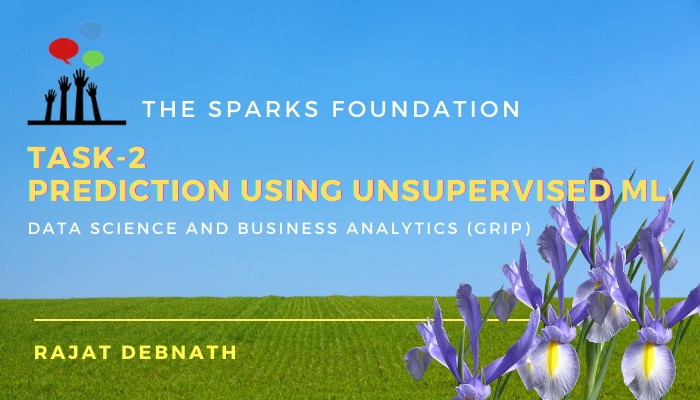

In [1]:
from IPython import display
display.Image("TASK2IMG.png")

#### Objective: The aim of this task is to predict the optimum number of clusters from the 'Iris' dataset and represent it visually.

# 1. Importing The Libraries & Data

In [2]:
#Importing Dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
#Importing Data 
df= pd.read_csv (r'C:\Users\rajat\Desktop\GRIP TASK-2\IRIS.csv') 
print("Imported successfully")
df.head(8)

Imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa


# 2. Inspecting The Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### As we can see here there are 150 entries or rows and 6 columns.

In [5]:
#Checking the distribution of the dataset

df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

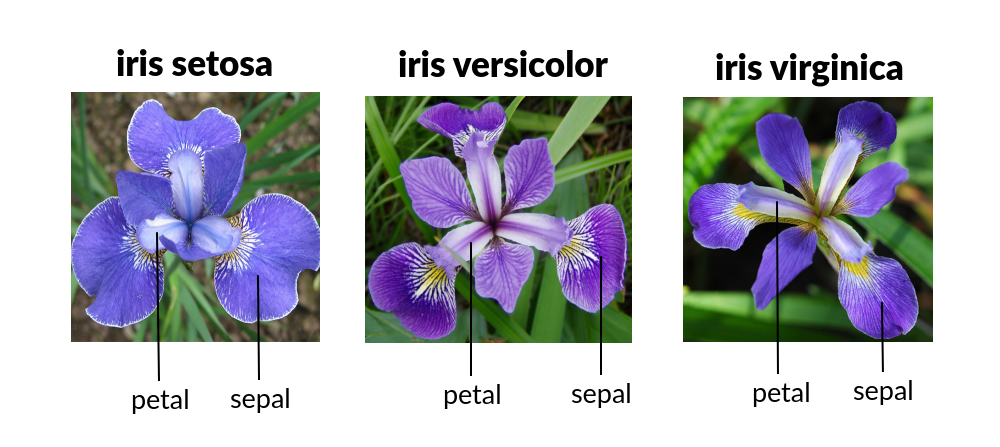

In [6]:
from IPython.display import Image
Image(r'C:\Users\rajat\Desktop\GRIP TASK-2\Image\IRIS.png')

### The above image clearly shows the types of iris flower and their petals and sepals.

In [7]:
#Descriptive Statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Here we can see the basic statistics: count of dataset, its mean, standard deviation, percentiles and max value.

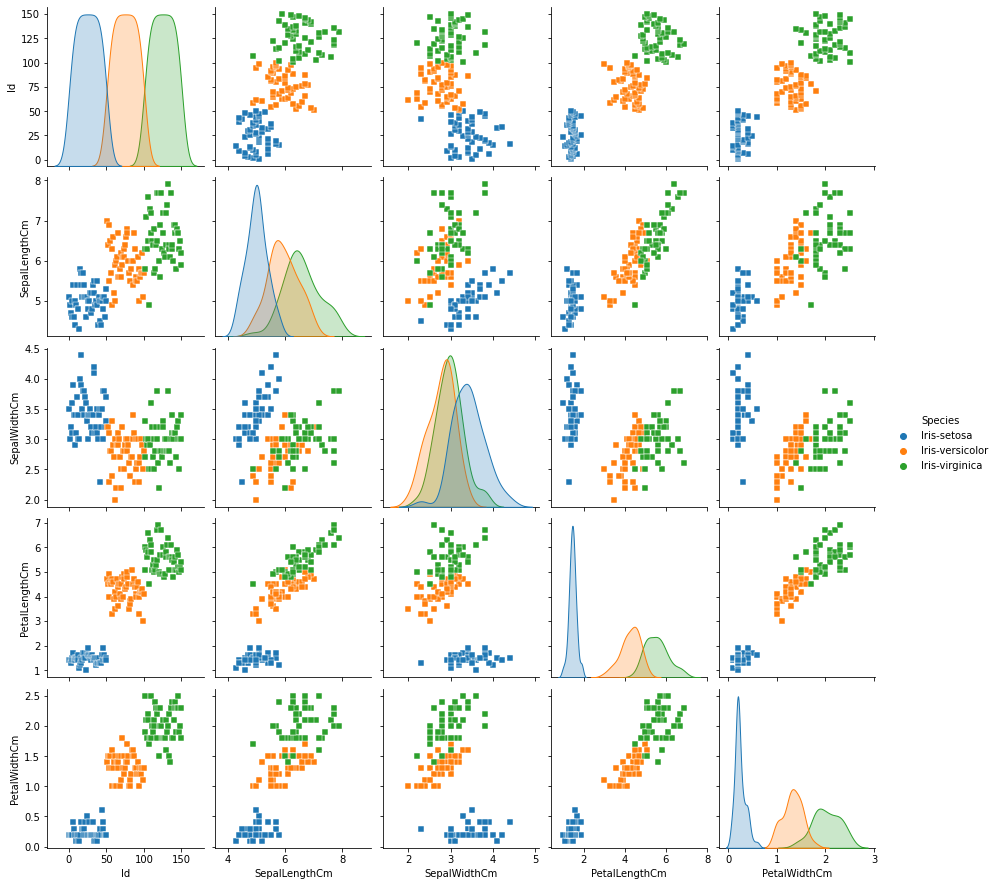

In [8]:
#Visualizing the relation between the variables

sns.pairplot(df, hue='Species', markers='s')
plt.show()

In [9]:
#Dropped unnecessary variables

df.drop("Id",inplace=True,axis=1)
df.drop("Species",inplace=True,axis=1)

<AxesSubplot:>

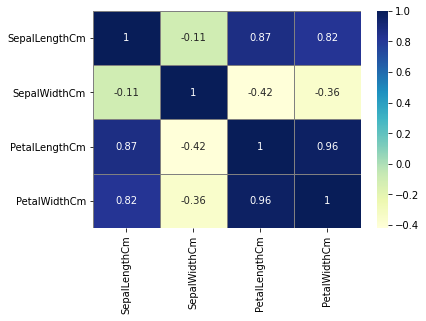

In [10]:
#Heatmap to show correlation between each variable:
sns.heatmap(df.corr(), linecolor = 'grey', linewidth=0.5, annot=True, cmap="YlGnBu")

# 3. Calculating the within-cluster sum of square:

In [11]:
# Calculating the within-cluster sum of square

within_cluster_sum_of_square = []
x = df.iloc[:, [0, 1, 2, 3]].values

clusters_range = range(1,11)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    within_cluster_sum_of_square.append(km.inertia_)

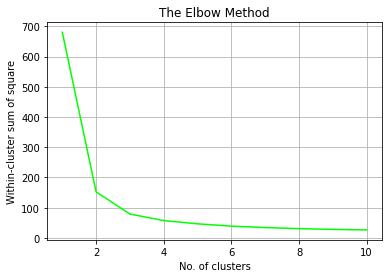

In [12]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, within_cluster_sum_of_square,color='lime')
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

# 4. Applying k means clustering on the data:

In [13]:
#Applying K-means Algorithm to the dataset
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(df)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# 5. Visualising the clusters:

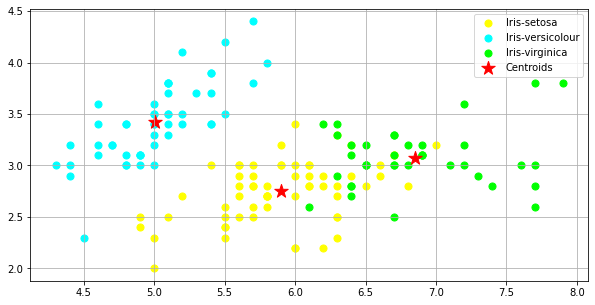

In [14]:
# Visualize the clusters 
plt.figure(figsize=(10,5))
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 50, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 50, c = 'cyan', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 50, c = 'lime', label = 'Iris-virginica')

# Plotting the cluster centers named centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 200, c = 'red', marker='*', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

# Here we can observe the optimum numer of clusters and their centers marked as Centroids.